# Lab assignment: dogs VS cats

<table><tr>
    <td><img src="img/doge.jpg" style="width:400px;height:400px;"></td>
    <td><img src="img/cat.jpg" style="width:400px;height:400px;"></td>
</tr></table>

In this assignment we will face an image classification problem, trying to tell apart images of dogs and images of cats. The final battle begins! And to do so we will use a Deep Learning approach.

## Guidelines

Throughout this notebook you will find empty cells that you will need to fill with your own code. Follow the instructions in the notebook and pay special attention to the following symbols.

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
You will need to solve a question by writing your own code or answer in the cell immediately below or in a different file, as instructed.</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
This is a hint or useful observation that can help you solve this assignment. You should pay attention to these hints to better understand the assignment.
</font>

***

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***
<font color=#259b4c>
This is an advanced exercise that can help you gain a deeper knowledge into the topic. Good luck!</font>

***

To avoid missing packages and compatibility issues you should run this notebook under one of the [recommended Deep Learning environment files](https://github.com/albarji/teaching-environments/tree/master/deeplearning).

The following code will embed any plots into the notebook instead of generating a new window:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Lastly, if you need any help on the usage of a Python function you can place the writing cursor over its name and press Caps+Shift to produce a pop-out with related documentation. This will only work inside code cells. 

Let's go!

## Data processing

The images to use in this assignment are available [here](https://drive.google.com/open?id=105jGDrjEgxx2W2gYhFF8Mbf1J9qJeDPm). Download the data package and extract it into a folder in your computer.

Data is structured under two folders, *train* and *test*. You are only allowed to use the *test* data to measure the performance of your model **after** you have finished training. Both *train* and *test* folders contain one subfolder per class (*cats* and *dogs*).

The recommended way to load an image from disk is to use the *imread* function from the *scikit-image* library. For example:

In [2]:
from skimage.io import imread

image = imread("img/sample.jpg")

This returns the image as 3-dimensional numpy matrix, containing the value of intensity of every pixel in each row, column and color channel.

In [3]:
image.shape

(499, 367, 3)

We can visualize the loaded image using

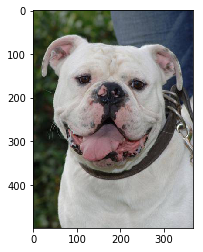

In [4]:
plt.imshow(image)

The dataset includes 20000 training images and 5000 test images, each image at a different resolution. Loading all this data at once requires too much memory, so we will need to **resize** each image to a smaller, common size as we load them from disk. We can do so by again making use of a *scikit-image* function. For example:

C:\Anaconda3\envs\deeplearning-labs\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


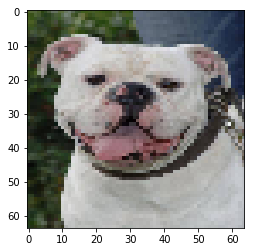

In [5]:
from skimage.transform import resize

size = 64
smallimage = resize(image, (64, 64, 3), mode="reflect")  # 64 x 64 pixels, 3 color channels
plt.imshow(smallimage)

In [0]:
import glob
data = {
    "train": {
        "X":[],
        "y":[]
    },
    "test": {
        "X":[],
        "y":[]
    }
}
for subset in ["train", "test"]:
    for target in ["cats", "dogs"]:
        for image_path in glob.glob('./catsVSdogs/{}/{}/*'.format(subset, target)):
            image = resize(imread(image_path), (64, 64, 3), mode="reflect")
            y = target == "dogs"
            data[subset]["X"].append(image)
            data[subset]["y"].append(y)

C:\Anaconda3\envs\deeplearning-labs\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
    
Perform the following tasks to prepare the data:
- Build a numpy array *X_train* containing one entry for each training image in the data. Each entry must contain the 3-dimensional matrix of pixels corresponding to an image. Make sure to scale down each image to a common size
- Normalize *X_train* so that pixels follow a distribution lying in the range [-0.5,0.5]
- Build a corresponding array *Y_train* with the class of each training image (0 for cats and 1 for dogs).
- Randomly shuffle the data. Make sure you shuffle both *X_train* and *Y_train* using the same permutation, so you don't lose track of the class of each training pattern.

- Repeat the whole procedure again to generate *X_test* and *Y_test* matrices for the test data.
</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
- Take advantage of the *glob* package to generate the filename lists for the indoor and outdoor subfolders.
- Since you need to repeat the procedure both for training and test data, it would be useful to implement a function that performs all the data loading and transforming steps.
</font>

***

In [0]:
from sklearn.utils import shuffle

X_train, Y_train = shuffle(np.array(data["train"]["X"]), np.array(data["train"]["y"]))
X_test, Y_test = shuffle(np.array(data["test"]["X"]), np.array(data["test"]["y"]))

I'm going to save this objects in order to upload them to google drive and work in Google Colab.

In [0]:
import pickle 

with open('X_train.pickle', 'wb') as X_train_pickle_file: 
    pickle.dump(X_train, X_train_pickle_file)
with open('Y_train.pickle', 'wb') as Y_train_pickle_file: 
    pickle.dump(Y_train, Y_train_pickle_file)
with open('X_test.pickle', 'wb') as X_test_pickle_file: 
    pickle.dump(X_test, X_test_pickle_file)
with open('Y_test.pickle', 'wb') as Y_test_pickle_file: 
    pickle.dump(Y_test, Y_test_pickle_file)

In [0]:
import pickle 
X_train = pickle.load(open( "X_train.pickle", "rb" ))
Y_train = pickle.load(open( "Y_train.pickle", "rb" ))
X_test = pickle.load(open( "X_test.pickle", "rb" ))
Y_test = pickle.load(open( "Y_test.pickle", "rb" ))

# IMPORTANT!
As this machine doesn't have GPU I decided to do the practice [here](https://colab.research.google.com/drive/1neTgcBThjQBENf8UKFowHYbPh1s6076A#scrollTo=lecs-X5mk69e) in Google Colab. So, some of the cells are not functinoal in jupyter local environment. 

The following piece of code was for loading the pickles in the google colab environment

In [3]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from googleapiclient.discovery import build
import io
import pickle
from googleapiclient.http import MediaIoBaseDownload

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get .pickle files id
listed = drive.ListFile({'q': "title contains '.pickle'"}).GetList()
ids_dict = {file['title'].replace('.pickle',''):file['id'] for file in listed}

#Load .pickles in memory

def load_from_drive_file(file_id):
  drive_service = build('drive', 'v3')
  request = drive_service.files().get_media(fileId=file_id)
  downloaded = io.BytesIO()
  downloader = MediaIoBaseDownload(downloaded, request)
  done = False
  while done is False:
      # _ is a placeholder for a progress object that we ignore.
      # (Our file is small, so we skip reporting progress.)
      _, done = downloader.next_chunk()

  downloaded.seek(0)
  return pickle.load(downloaded)

X_train = load_from_drive_file(ids_dict["X_train"])
Y_train = load_from_drive_file(ids_dict["Y_train"])
X_test = load_from_drive_file(ids_dict["X_test"])
Y_test = load_from_drive_file(ids_dict["Y_test"])

    100% |████████████████████████████████| 993kB 20.1MB/s 


In [0]:
X_train = X_train -0.5
X_test = X_test - 0.5 

If everything has been properly loaded both X_train and Y_train lists should have equal length, and the same should happen for the pair X_test and Y_test.

In [5]:
print("X_train size", len(X_train))
print("Y_train size", len(Y_train))
print("X_test size", len(X_test))
print("Y_test size", len(Y_test))

X_train size 20000
Y_train size 20000
X_test size 5000
Y_test size 5000


## Basic deep model

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***
<font color=#ad3e26>
Create a deep network that achieves at least a 60% of accuracy in the test set. Make use of the layers you seem fit for problem. You cannot use the test data for fitting the network, but you can use it to check the final performance of different network architectures, and select the architecture performing best.</font>

***

<img src="img/exclamation.png" height="80" width="80" style="float: right;"/>

***
<font color=#2655ad>
    
If you are unable to attain the required 60% of accuracy, or your accuracy is too close to 100%, review the following checklist:
- Have you mixed training and test data?
- Have the values of the pixels been normalized?
- Have you compiled the model with a loss function appropriate for **binary** classification?
- Have you used ReLU units in the hidden layers? Have you used sigmoid or softmax layers in the output layer?

***

In [6]:
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.layers.core import Dropout

Using TensorFlow backend.


In [0]:
from keras.utils import np_utils
trainvectors = X_train.reshape(20000, 12288)
testvectors = X_test.reshape(5000, 12288)
Y_train = np_utils.to_categorical(Y_train, 2) 
Y_test = np_utils.to_categorical(Y_test, 2) 

In [8]:
model = Sequential()
model.add(Dense(512, input_dim=12288))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(2))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    trainvectors, # Training data
    Y_train, # Labels of training data
    batch_size=128, # Batch size for the optimizer algorithm
    epochs=20, # Number of epochs to run the optimizer algorithm
    verbose=2 # Level of verbosity of the log messages
)
preds = model.predict_classes(testvectors)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               6291968   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)  

To avoid training the model each time, I'm going to save it and then load it

In [9]:
preds = model.predict_classes(testvectors)
score = model.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

5000/5000 [==============================] - 1s 122us/step
Test loss 0.6663597373008728
Test accuracy 0.6536


In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("simple_deep_mlp.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("simple_deep_mlp.h5")

In [0]:
from keras.models import model_from_json
json_file = open('simple_deep_mlp.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
simple_deep_mlp = model_from_json(loaded_model_json)
simple_deep_mlp.load_weights("simple_deep_mlp.h5")
simple_deep_mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
preds = simple_deep_mlp.predict_classes(testvectors)
score = simple_deep_mlp.evaluate(testvectors, Y_test)
print("Test loss", score[0])
print("Test accuracy", score[1])

5000/5000 [==============================] - 2s 309us/step
Test loss 0.6612501173019409
Test accuracy 0.653


With a simple deep model, we obtained a 65% of accuaracy. It was expected to do a poor job due to we are throwing away very useful spacial information.

In [0]:
from random import randint
import numpy as np
idxs= np.where(preds != Y_test[:,1])[0]

predicted class cat


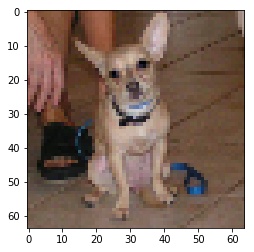

In [11]:
idx = randint(0,len(idxs)-1)
plt.imshow(X_test[idxs[idx]] + 0.5)
print("predicted class {}".format("dog" if preds[idxs[idx]] == 1 else "cat"))

In [0]:
traintensor = X_train.reshape(20000, 64, 64, 3)
testtensor = X_test.reshape(5000, 64, 64, 3)

## Improving the network

<img src="img/pro.png" height="80" width="80" style="float: right;"/>

***

<font color=#259b4c>
    
You can further improve your results by applying one or more of the following strategies:
- Keep apart a portion of the training data as a **validation set**. Then use an <a href="https://keras.io/callbacks/#earlystopping">**EarlyStopping strategy**</a> to monitor the loss of these validation data, and stop when training when after a number of iterations such loss has not decreased.
- Make use of **metamodelling techniques** to select the best architecture parameters for the networks. You can use scikit-learn methods GridSearchCV or RandomSearchCV. You can do those by using the <a href="https://keras.io/scikit-learn-api/">KerasClassifier</a> wrapper. Even better, you can mix KerasClassifier with an advanced search method such as [BayesSearch](https://scikit-optimize.github.io/#skopt.BayesSearchCV), included in the [scikit-optimize](https://scikit-optimize.github.io/) library.
- Use **image augmentation techniques** to artifically create new training images. To do so, you can make use of <a href="https://keras.io/preprocessing/image/">ImageDataGenerator</a> in Keras.
- Make use of a pre-trained large network, building your network on top of it. You can find some examples in the [Keras Applications](https://keras.io/applications/) page.

If you correctly use these techniques you should be able to improve your model. With some effort it is possible to up to a 90% test accuracy. Try to do your best!</font>

***

#### Convolutional Multilayer Network
Now I'm going to try to improve the model performance, by building a new DNN with convolutional layers, wich takes into consideration the spacial information aformentioned

In [0]:
from keras.layers.core import Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

def create_model(conv_channels = 64, kernel_size = 3, pool_size = 2, dropout = 0.4):
    model = Sequential()
    model.add(Convolution2D(32, # Number convolution channels to generate
                         (kernel_size, kernel_size), # Size of convolution kernels
                          padding='valid')) # Strategy to deal with borders
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(dropout))  
    model.add(Convolution2D(32, # Number convolution channels to generate
                         (kernel_size, kernel_size), # Size of convolution kernels
                          padding='valid')) # Strategy to deal with borders
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(dropout))  
    model.add(Convolution2D(32, # Number convolution channels to generate
                         (kernel_size, kernel_size), # Size of convolution kernels
                          padding='valid')) # Strategy to deal with borders
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))
    model.add(Dropout(dropout))  
    model.add(Flatten())
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
clf = KerasClassifier(create_model, epochs=30, batch_size=64, verbose=2)

In [17]:
clf.fit(X_train, Y_train)

Epoch 1/30
 - 7s - loss: 0.6548 - acc: 0.5990
Epoch 2/30
 - 6s - loss: 0.5759 - acc: 0.6966
Epoch 3/30
 - 6s - loss: 0.5362 - acc: 0.7312
Epoch 4/30
 - 6s - loss: 0.5024 - acc: 0.7559
Epoch 5/30
 - 6s - loss: 0.4757 - acc: 0.7749
Epoch 6/30
 - 6s - loss: 0.4576 - acc: 0.7864
Epoch 7/30
 - 6s - loss: 0.4413 - acc: 0.7955
Epoch 8/30
 - 6s - loss: 0.4270 - acc: 0.8017
Epoch 9/30
 - 6s - loss: 0.4158 - acc: 0.8115
Epoch 10/30
 - 6s - loss: 0.4091 - acc: 0.8122
Epoch 11/30
 - 6s - loss: 0.3982 - acc: 0.8175
Epoch 12/30
 - 6s - loss: 0.3915 - acc: 0.8237
Epoch 13/30
 - 6s - loss: 0.3837 - acc: 0.8266
Epoch 14/30
 - 6s - loss: 0.3760 - acc: 0.8304
Epoch 15/30
 - 6s - loss: 0.3797 - acc: 0.8271
Epoch 16/30
 - 6s - loss: 0.3666 - acc: 0.8363
Epoch 17/30
 - 6s - loss: 0.3654 - acc: 0.8368
Epoch 18/30
 - 6s - loss: 0.3617 - acc: 0.8415
Epoch 19/30
 - 6s - loss: 0.3573 - acc: 0.8442
Epoch 20/30
 - 6s - loss: 0.3546 - acc: 0.8429
Epoch 21/30
 - 6s - loss: 0.3547 - acc: 0.8424
Epoch 22/30
 - 6s - lo

In [19]:
clf.score(X_test, Y_test)

0.8728

### Pretrained wheights and Dense Network
Finally, I'm going to try use a pre-fitted convolutional model and then connect it with a dense network and fit it

In [0]:
from sklearn.base import TransformerMixin, BaseEstimator
from keras.applications.vgg16 import VGG16
class VGG16Transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.model = VGG16(weights='imagenet', input_shape=(64,64,3), include_top=False)
    def transform(self, X, y=None):
        return self.model.predict(X)
    def fit(self, X, y=None):
        return self

In [23]:
vgg16Transformer = VGG16Transformer()

58892288/58889256 [==============================] - 5s 0us/step


In [0]:
def create_dense_model(dropout=0.4, hiden_layers_neurons = 512):
    model = Sequential()
    model.add(Dense(hiden_layers_neurons))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(hiden_layers_neurons))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Flatten())
    model.add(Dense(2))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
    return model

In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
my_clf = KerasClassifier(create_dense_model, epochs=30, batch_size=128, verbose=2)

In [0]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(
    steps=[('trs', vgg16Transformer),('clf', my_clf)]
)

In [27]:
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

opt = BayesSearchCV( pipeline, { 'clf__batch_size': (64,128), 'clf__dropout': Real(0.25, 0.6), 'clf__hiden_layers_neurons': (256,512,1024)}, n_iter=5 )

In [0]:
opt.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
 - 2s - loss: 0.5220 - acc: 0.7404
Epoch 2/30
 - 1s - loss: 0.4318 - acc: 0.7952
Epoch 3/30
 - 1s - loss: 0.4051 - acc: 0.8136
Epoch 4/30
 - 1s - loss: 0.3931 - acc: 0.8186
Epoch 5/30
 - 1s - loss: 0.3674 - acc: 0.8327
Epoch 6/30
 - 1s - loss: 0.3584 - acc: 0.8377
Epoch 7/30
 - 1s - loss: 0.3433 - acc: 0.8429
Epoch 8/30
 - 1s - loss: 0.3338 - acc: 0.8524
Epoch 9/30
 - 1s - loss: 0.3188 - acc: 0.8561
Epoch 10/30
 - 1s - loss: 0.3010 - acc: 0.8658
Epoch 11/30
 - 1s - loss: 0.2921 - acc: 0.8702
Epoch 12/30
 - 1s - loss: 0.2735 - acc: 0.8798
Epoch 13/30
 - 1s - loss: 0.2606 - acc: 0.8861
Epoch 14/30
 - 1s - loss: 0.2533 - acc: 0.8895
Epoch 15/30
 - 1s - loss: 0.2339 - acc: 0.8996
Epoch 16/30
 - 1s - loss: 0.2182 - acc: 0.9053
Epoch 17/30
 - 1s - loss: 0.2102 - acc: 0.9119
Epoch 18/30
 - 1s - loss: 0.1993 - acc: 0.9150


BayesSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('trs', VGG16Transformer()), ('clf', <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f2aa619d9e8>)]),
       fit_params=None, iid=True, n_iter=5, n_jobs=1, n_points=1,
       optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
       refit=True, return_train_score=False, scoring=None,
       search_spaces={'clf__batch_size': (64, 128), 'clf__dropout': Real(low=0.25, high=0.6, prior='uniform', transform='identity'), 'clf__hiden_layers_neurons': (256, 512, 1024)},
       verbose=0)

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

output = open('vgg16.pkl', 'wb')
pickle.dump(opt,output)
file = drive.CreateFile({'parents':[{u'id':'1zjr_w2tGvzU3yjxUMFFjmAu0NGFSjFlK'}]})
file.SetContentFile('vgg16.pkl')
file.Upload()

In [28]:
vgg16_model = load_from_drive_file('12ZyOosInZwMzxKPtskicLK01Asn0YVRJ')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
vgg16_model = pickle.load(open('vgg16.pkl','rb'))

C:\Anaconda3\envs\deeplearning-labs\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator Pipeline from version 0.20.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Anaconda3\envs\deeplearning-labs\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.3 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [29]:
vgg16_model.score(X_test, Y_test)

0.8229999951720238

## Analyzing the results

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>
Find and show some test images for which your model fails. Can you give an explanation for this behavior?</font>

***

In [0]:
clf_preds = clf.predict(X_test)
vgg_preds = vgg16_model.predict(X_test)

In [0]:
def plot_wrong_classified(preds):
  idxs = np.where(preds != Y_test[:,1])[0]
  fig=plt.figure(figsize=(16,9))
  columns = 6
  rows = 5  
  for i in range(1, columns*rows +1):
    idx = randint(0,len(idxs)-1)
    img = X_test[idxs[idx]] + 0.5
    predicted = "dog" if preds[idxs[idx]] == 1 else "cat"
    fig.add_subplot(rows, columns, i)
    plt.title(predicted)
    plt.imshow(img)
  plt.show()
  plt.tight_layout()

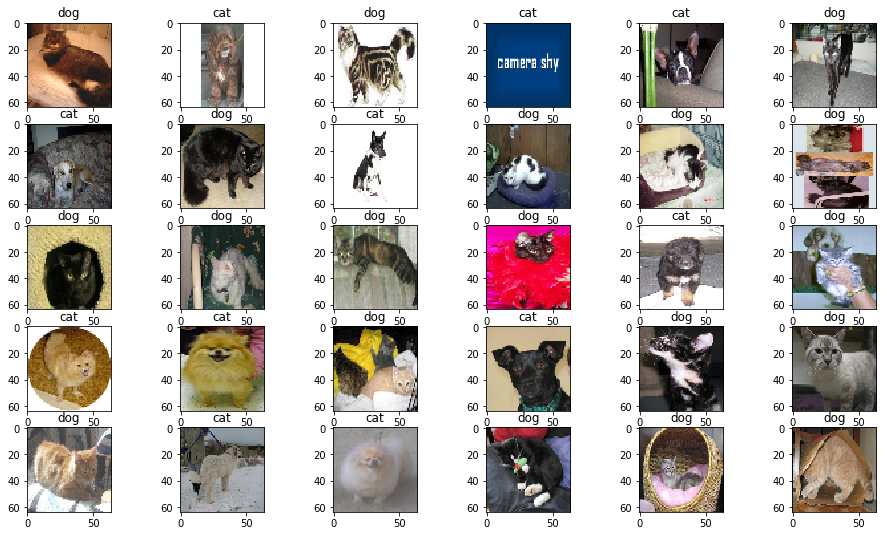

<Figure size 432x288 with 0 Axes>

In [49]:
plot_wrong_classified(clf_preds)

In this case we can see that the classifier tends to misclassificate fluffy dogs as cats. Also there are some poor images where the animal is dressed or holded, or there are many of them making a little harder to decide which one is on the picture. On the other hand, we have some bad images, like the "camera shy"...


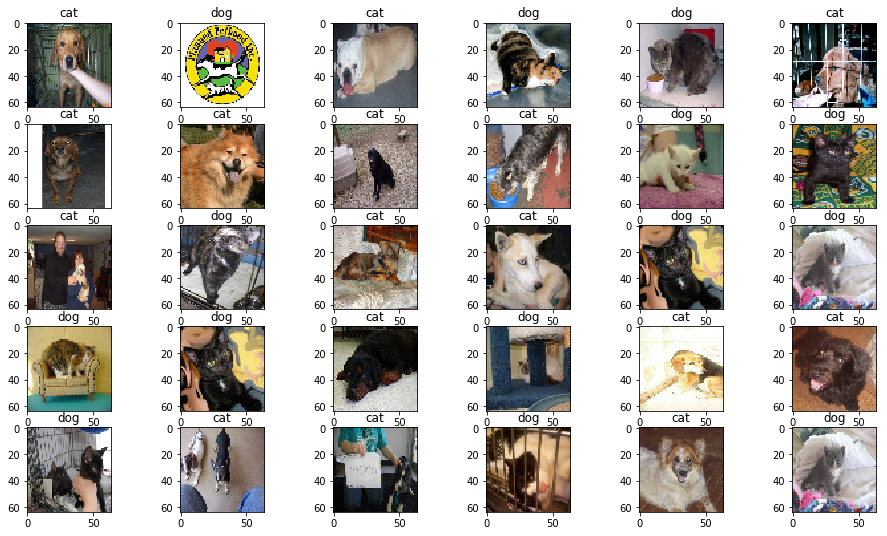

<Figure size 432x288 with 0 Axes>

In [51]:
plot_wrong_classified(vgg_preds)

If we analyze this classifier, the behaviour is similar, because the dataset is the same and then there still are some bad images like a logo, or people in the images.

<img src="img/question.png" height="80" width="80" style="float: right;"/>

***

<font color=#ad3e26>||
Write a small report summarizing the network choices you have tried, what worked and what didn't. What have you learned from this experience?</font>

***

Firstly I've started with the simplest model, just a deep model using each pixel information but leaving its environment away. Then I've tried with a Multilayer Convolutional-Pooling model, adding also some Dropout layers to avoid overfitting. This worked pretty well, reaching a test accuarcy of 87%.  Finally I've tried using a pre-trained model and adding a dense multilayer network at it end. This also work. I wanted to apply some cross-validation to hyperparametrize the final model better but I've got a worse performance than the previous model. I think If I had added more examples with the Image Generator, I would have obateined a better model. But this takes too long to fit because the  BayesianSearchCV. 

I've learnead that I should buy a computer with a GPU! In my local machine takes too long to fit, so I used the google colab platform, and even ther the bayesianSearch took almost two hours to give me the final model. I don't want to imagine what would have happened If I tried that in my machine.

I've found the subject very interesting and I when I finish the course I want to go deeper and learn a little more about this topic. 